In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [147]:
path_original = "../vega_shrinkwrapper_original/NewBlade/NewBlade001_short.csv"
df_original = pd.read_csv(path_original)

In [148]:
df_original[" cut position"] = df_original[" cut position"]+ 884605.000000

[]

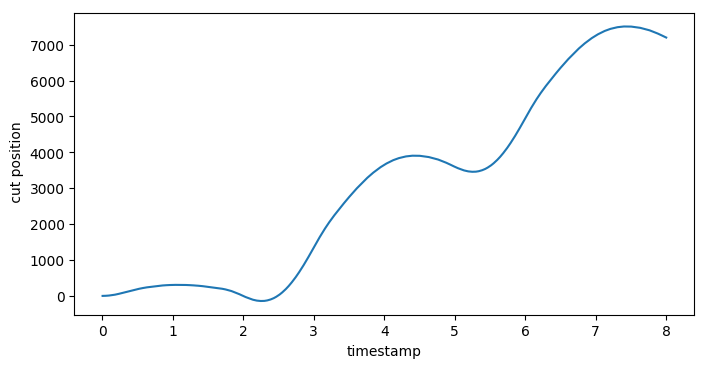

In [149]:
fig = plt.figure(figsize=(8,4),dpi=100)
ax = fig.add_subplot(111)
sns.lineplot(x=df_original.iloc[:,0] , y=df_original.iloc[:,3], ax=ax)
plt.plot()

In [119]:
df_original.iloc[899,:]

timestamp              3.600000
 cut torque           -0.348639
 cut lag error        -0.018689
 cut position       2973.000000
 cut speed          2149.200439
 film position     15623.000000
 film speed         1384.899536
 film lag error        0.681986
Name: 899, dtype: float64

In [138]:
dims = 1
step_n = 1099
step_set = [-60, 0, 60]
origin = np.zeros((1,dims))
print(origin)
origin[0][0]=  2973.000000
print(origin)
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
print(steps.shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1]
stop = path[-1:]

[[0.]]
[[2973.]]
(1099, 1)


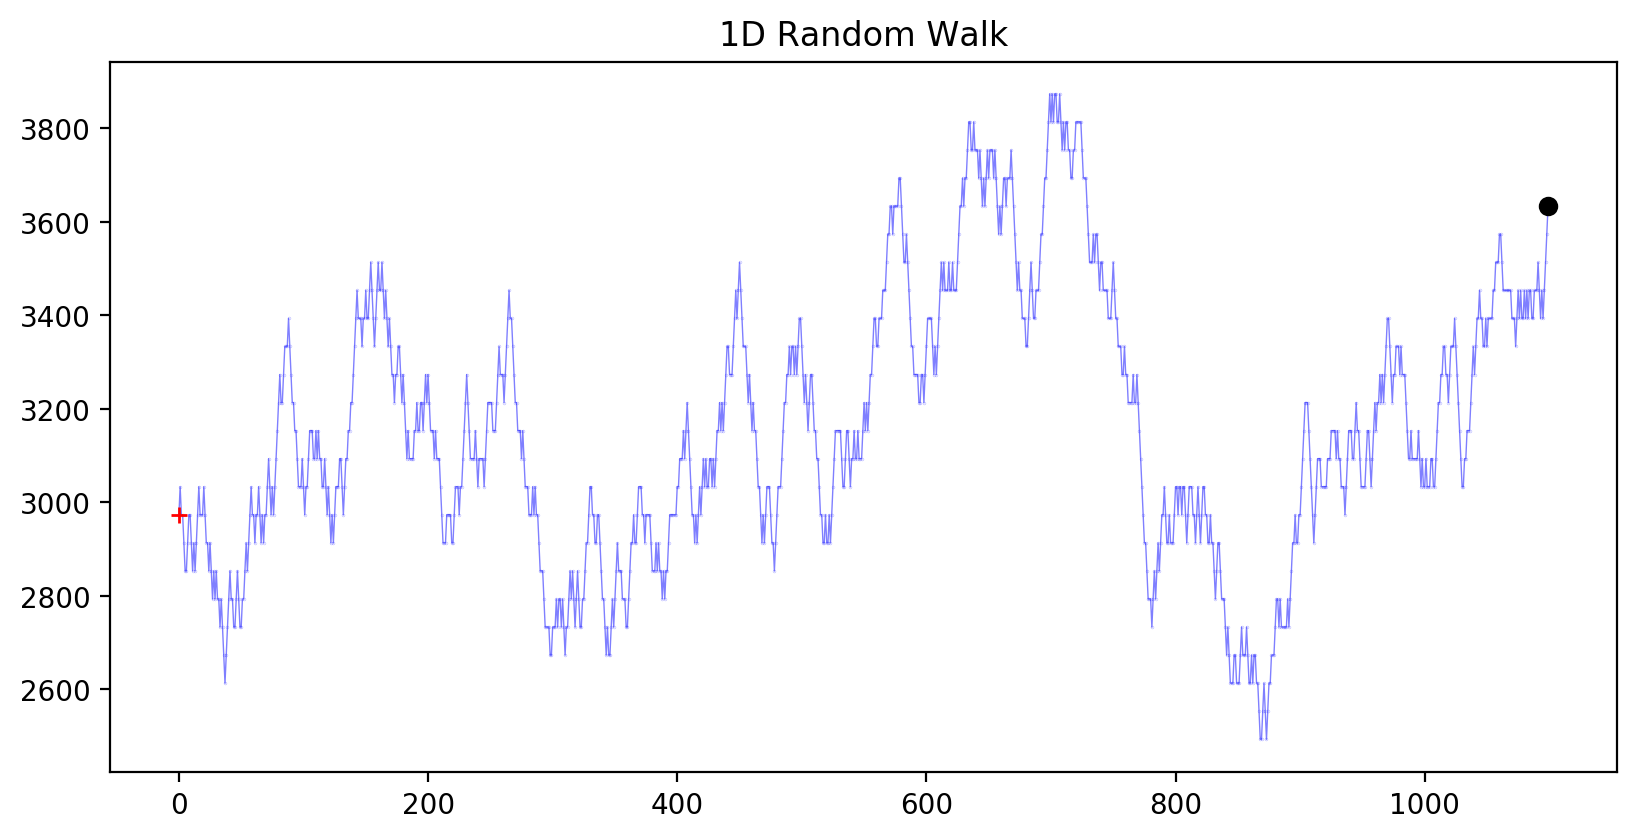

In [139]:
fig = plt.figure(figsize=(8,4),dpi=200)
ax = fig.add_subplot(111)
ax.scatter(np.arange(step_n+1), path, c='blue',alpha=0.25,s=0.05);
ax.plot(path,c='blue',alpha=0.5,lw=0.5,ls='-',);
ax.plot(0, start, c='red', marker='+')
ax.plot(step_n, stop, c='black', marker='o')
plt.title('1D Random Walk')
plt.tight_layout(pad=0)
#plt.savefig(‘plots/random_walk_1d.png’,dpi=250)
plt.show()

In [140]:
df_original.iloc[900:2000,3:4]= path
print(df_original.shape)

(2000, 8)


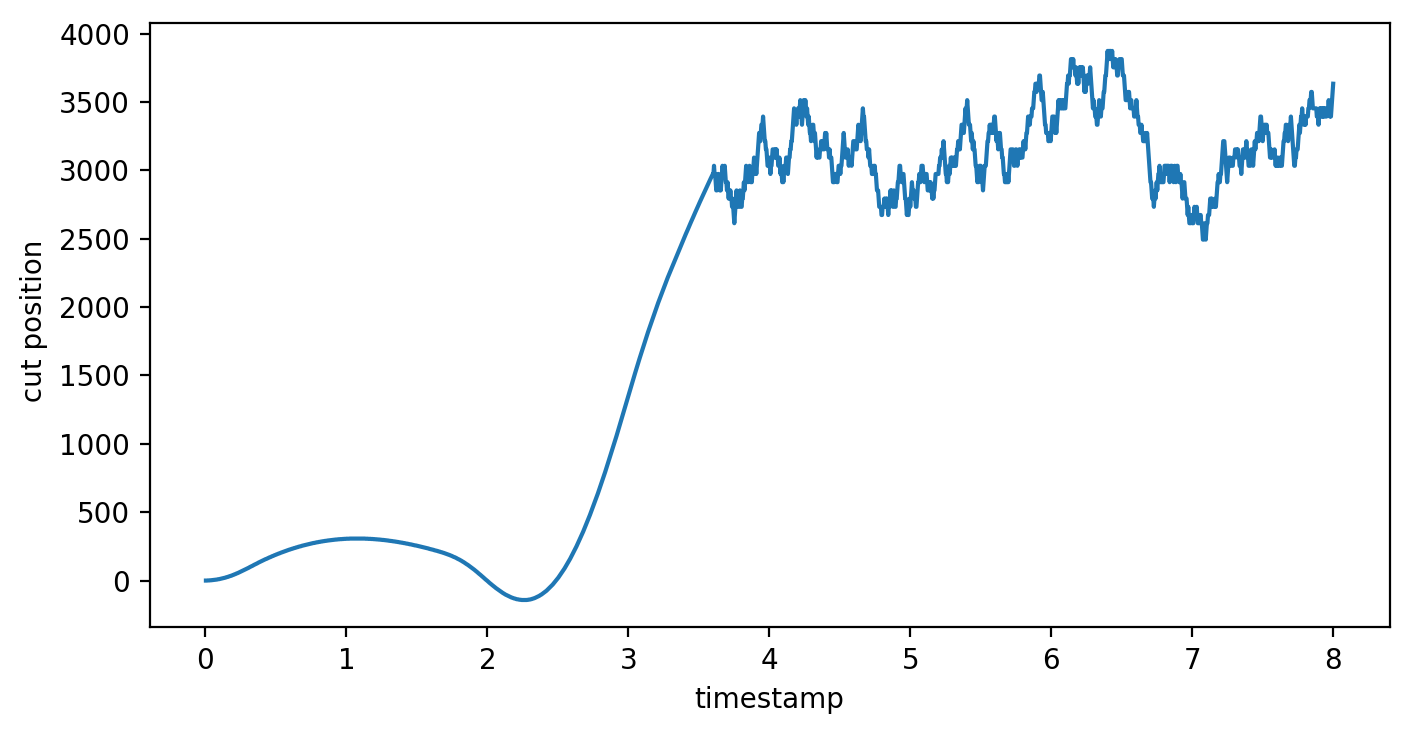

In [142]:
fig = plt.figure(figsize=(8,4),dpi=100)
ax = fig.add_subplot(111)
sns.lineplot(x=df_original.iloc[:,0] , y=df_original.iloc[:,3], ax=ax)

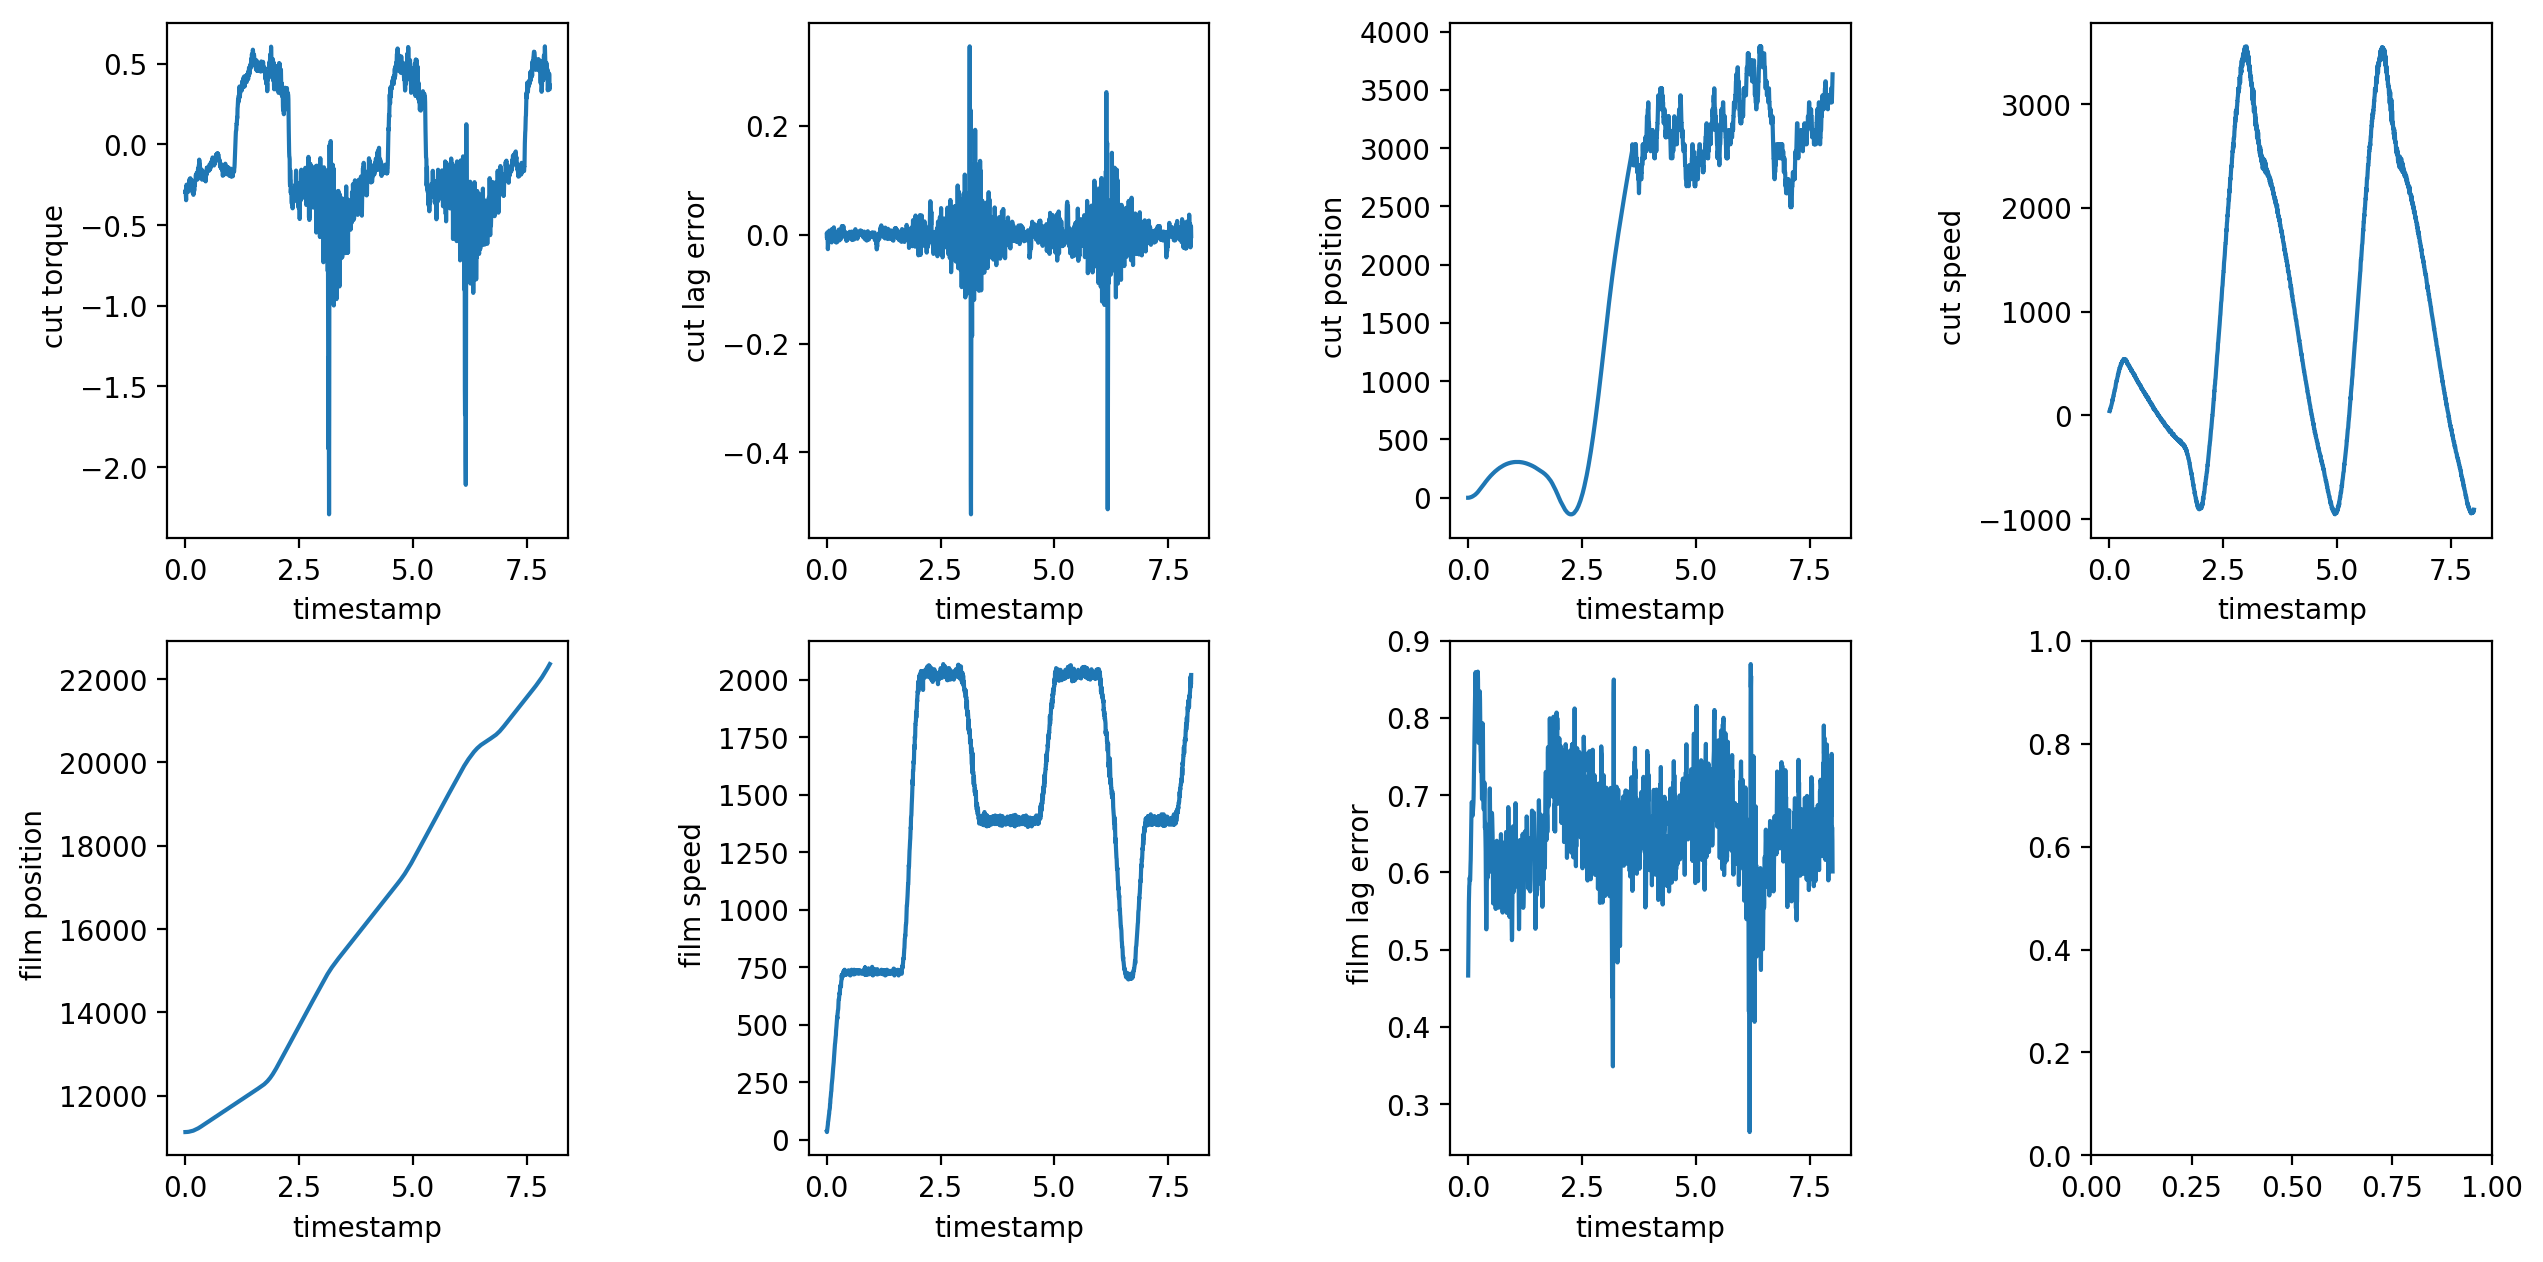

In [144]:
fig, axes = plt.subplots(2, 4, figsize=(15,7.5), dpi=200)
ax = axes.ravel()
plt.subplots_adjust(hspace=0.2, wspace=0.6)
for i in range(1,8):
    sns.lineplot(x=df_original.iloc[:,0] , y=df_original.iloc[:,i], ax=ax[i-1])
#plt.savefig("../graphs/raw_sensor_data.png")
plt.show()

In [145]:
df_original.to_csv("./NewBlade_random_walk.csv", index=False, sep=",")